# Task 2 - Prediction using Unsupervised ML

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Library-and-datasets" data-toc-modified-id="Importing-Library-and-datasets-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Library and datasets</a></span><ul class="toc-item"><li><span><a href="#Importing-libraries" data-toc-modified-id="Importing-libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Importing libraries</a></span></li><li><span><a href="#Importing-dataset" data-toc-modified-id="Importing-dataset-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Importing dataset</a></span></li><li><span><a href="#Inspecting-dataset" data-toc-modified-id="Inspecting-dataset-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Inspecting dataset</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Univariate-analysis" data-toc-modified-id="Univariate-analysis-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Univariate analysis</a></span></li><li><span><a href="#Bi-variate-analysis" data-toc-modified-id="Bi-variate-analysis-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Bi variate analysis</a></span></li></ul></li><li><span><a href="#Hopkin's-check" data-toc-modified-id="Hopkin's-check-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Hopkin's check</a></span></li><li><span><a href="#Model-Building-using-Kmeans-algorithm" data-toc-modified-id="Model-Building-using-Kmeans-algorithm-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model Building using Kmeans algorithm</a></span><ul class="toc-item"><li><span><a href="#Elbow-Curve----Optimum-number-of-clusters" data-toc-modified-id="Elbow-Curve----Optimum-number-of-clusters-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Elbow Curve  - Optimum number of clusters</a></span></li><li><span><a href="#Final-model" data-toc-modified-id="Final-model-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Final model</a></span></li><li><span><a href="#Visualizing-clusters" data-toc-modified-id="Visualizing-clusters-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Visualizing clusters</a></span></li></ul></li></ul></div>

## Importing Library and datasets

### Importing libraries

In [1]:
# Importing libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import datasets
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Importing dataset

In [2]:
#Importing dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Inspecting dataset

In [3]:
# Checking info
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


`Conclusion` : From the info, it is clear that there are no nulls present in the dataset

In [4]:
iris_df.shape

(150, 4)

In [5]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


`Conclusion` : From the description, it is evident that there are no outliers as there is not much difference between mean and 50% percentile. Also the values are increasing steadily and there is not a huge jump or sudden jump in the values

## EDA

### Univariate analysis

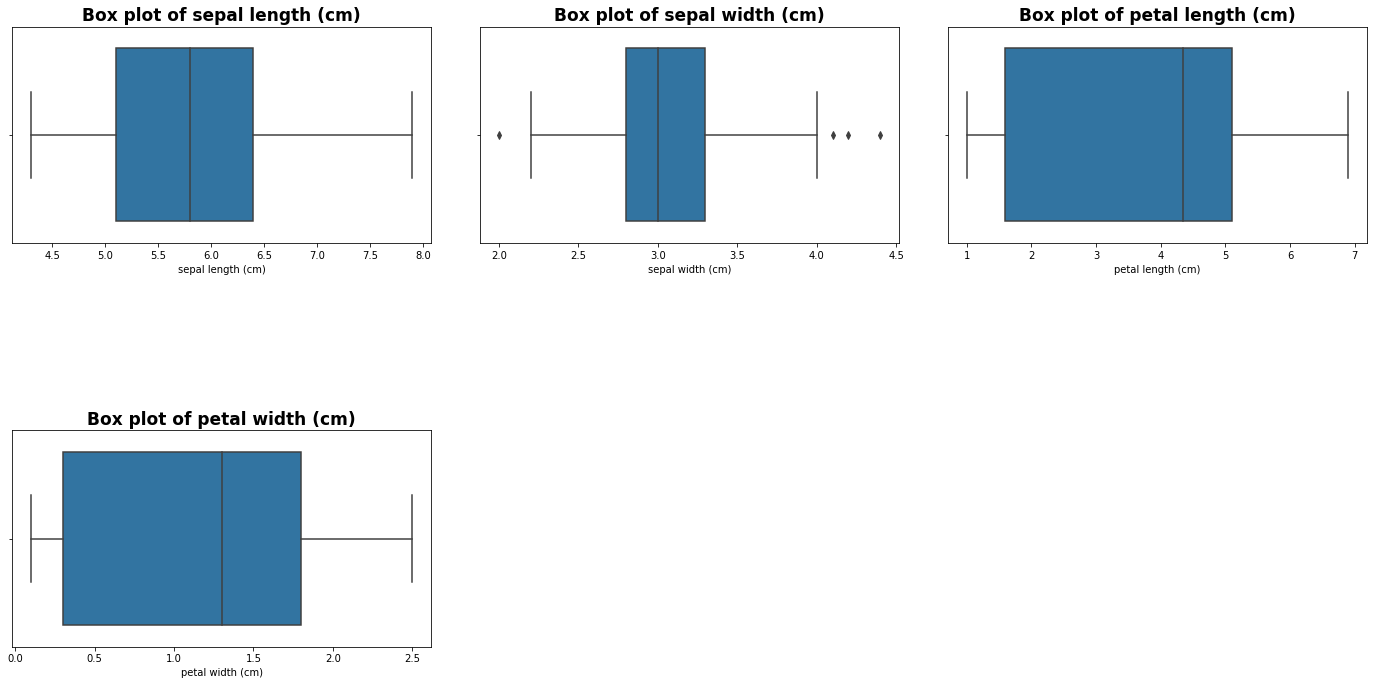

In [6]:
# Making list of numerical columns
num_cols = iris_df.select_dtypes('float64').columns.to_list()
num_cols

# Plotting box plots
plt.figure(figsize=(20,6))
for i in enumerate (num_cols):
    plt.subplot(2,3,i[0]+1)
    sns.boxplot(i[1], data = iris_df)
    plt.title('Box plot of ' +i[1], fontweight = 'bold', fontsize = 17)
    plt.tight_layout(pad=4.0)
    plt.subplots_adjust(top=1.6)
plt.show()

`Conclusion: ` From the boxplots it's clear that there are no outliers in data and we can move ahead with further analysis

### Bi variate analysis

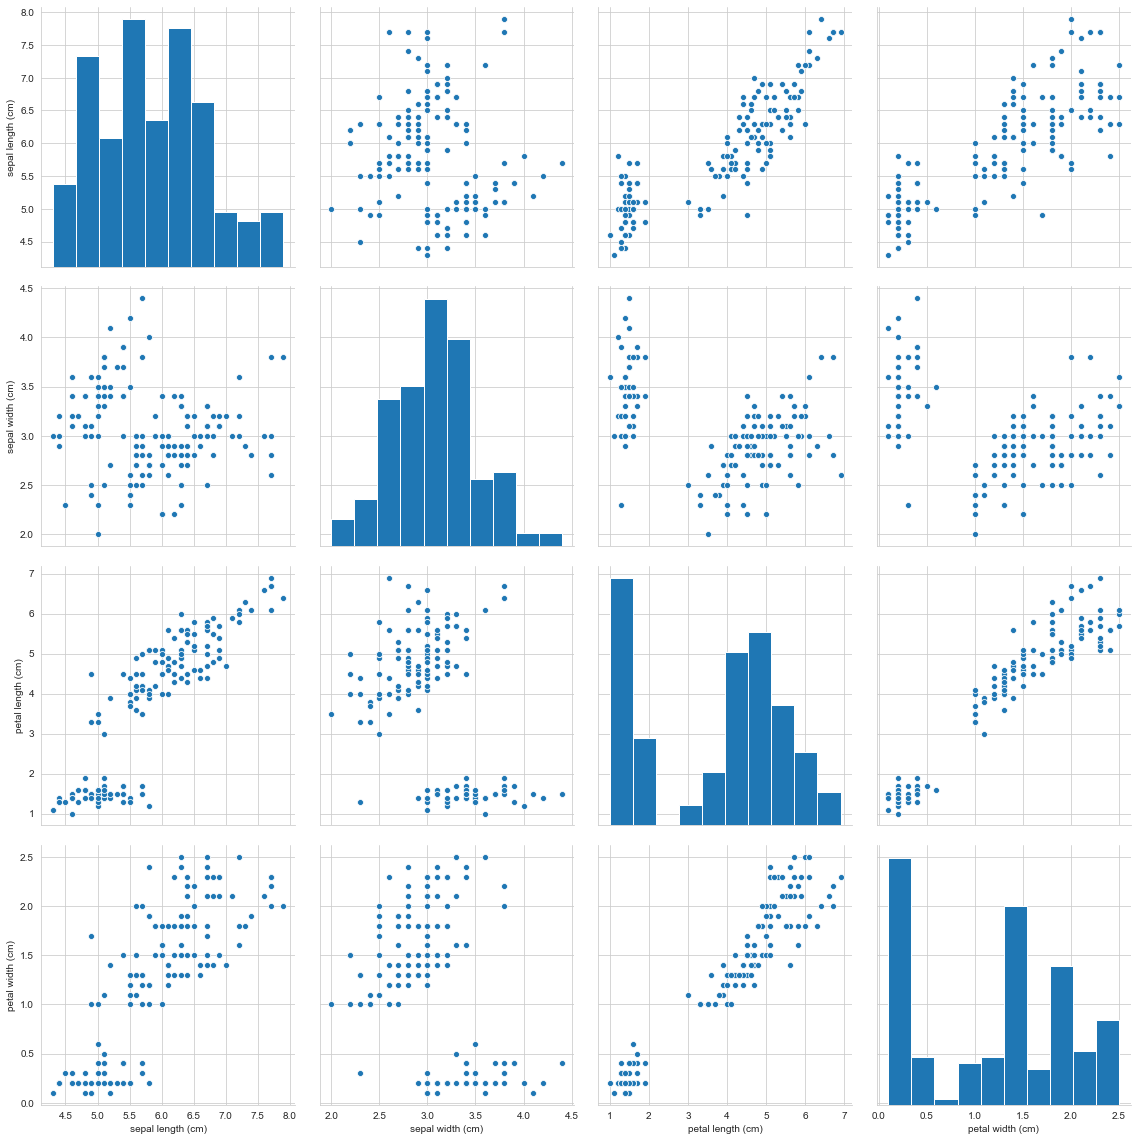

In [7]:
sns.set_style("whitegrid");
sns.pairplot(iris_df, size=4)
plt.show()

## Hopkin's check

In [8]:
# Checking whether dataset is suitable for classification

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

hopkins(iris_df)

0.8534748198123231

`Conclusion:` The hopkins measure is greater than 0.5 which means that the data is suitable for classification. So, lets go ahead and decide the optimum number of clusters which could be made 

## Model Building using Kmeans algorithm

### Elbow Curve  - Optimum number of clusters

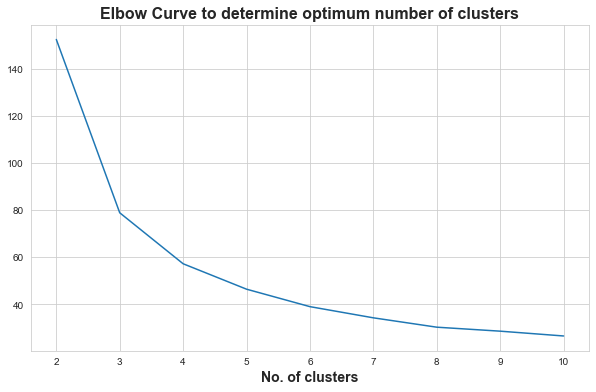

In [9]:
ssd_list =[]
k_value_list = [2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(10,6))

# Calculating sum of sqaured distances which is needed to plot the Elbow - Curve
for k in k_value_list:
    kmeans = KMeans(n_clusters=k, random_state=100)
    kmeans.fit(iris_df)
    
    ssd = kmeans.inertia_
    ssd_list.append([k,ssd])
    
# Plotting the curve
plt.plot(pd.DataFrame(ssd_list)[0], pd.DataFrame(ssd_list)[1])
plt.xlabel('No. of clusters', fontweight = 'bold', fontsize = 14)
plt.title('Elbow Curve to determine optimum number of clusters', fontweight = 'bold', fontsize = 16)
plt.show()

`Inferences from Elbow - Curve:`
 - In the Elbow- curve we take that value of K which sees a significant drop in ssd (sum of squared distance) and after which there is no sudden drop in the value of ssd.
 - From the elbow curve its clear that k = 3 is an optimal value of k
 - So lets build the final model with k = 3 and analyse the clusters ahead!

### Final model

In [10]:
# Finalizing the model with 3 as the number of clsuters
classification_model = KMeans(n_clusters=3, random_state=100)
# Fitting the model on the data frame
classification_model.fit(iris_df)
# Storing the cluster id in cluster array
cluster = classification_model.labels_
cluster


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [11]:
# Adding this cluster to dataset
iris_df['Cluster_id'] = cluster
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster_id
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Visualizing clusters

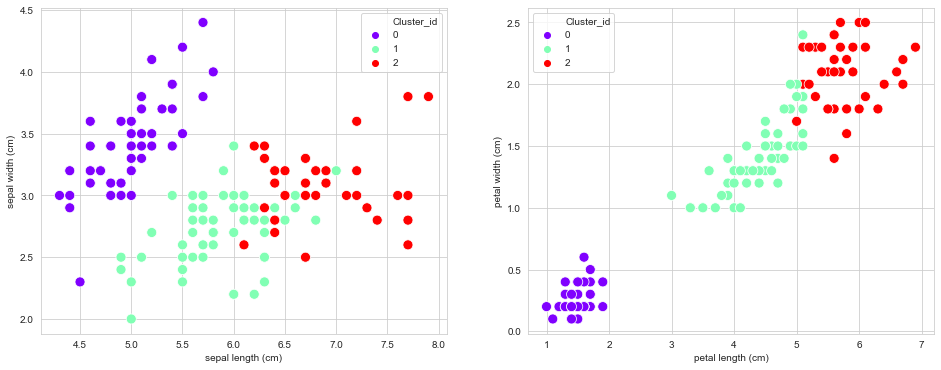

In [12]:
# Plotting the clusters
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.scatterplot(x = 'sepal length (cm)', y = 'sepal width (cm)', hue='Cluster_id',legend='full', palette='rainbow',data=iris_df, s = 100)
plt.subplot(1,2,2)
sns.scatterplot(x = 'petal length (cm)', y = 'petal width (cm)', hue='Cluster_id',legend='full', palette='rainbow',data=iris_df, s = 100)
plt.show()

`Inferences: `

| CLUSTER | Petal length | Petal width | Sepal length | Petal width |
| --- | --- || --- | --- |
| 0 | Low | Low | Low | Medium - High |
| 1 | Medium | Medium | Medium | Low |
| 2 | High | High | High | Medium - High |

From above table, we can say that `Cluster 0` represents `Setosa`, `Cluster 1` represents `Versicolor` and `Cluster 2` represents `Virginica`

In [13]:
# Making a pivot table to check average values in each cluster
iris_pivot = iris_df.pivot_table(values =num_cols, index= 'Cluster_id', aggfunc='mean')
iris_pivot

,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
Cluster_id,,,,
0,1.462000,0.246000,5.006000,3.428000
1,4.393548,1.433871,5.901613,2.748387
2,5.742105,2.071053,6.850000,3.073684


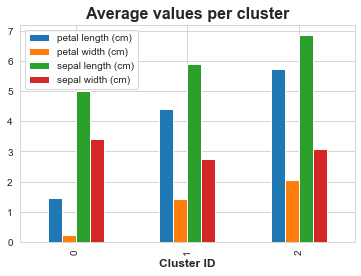

In [14]:
iris_pivot.plot(kind = 'bar')
plt.xlabel('Cluster ID', fontweight = 'bold', fontsize = 12)
plt.title('Average values per cluster', fontweight = 'bold', fontsize = 16)
plt.show()